<a href="https://colab.research.google.com/github/swapnamethraskar/OIBSIP/blob/main/Oasis_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Name : Swapna Methraskar



## **TASK 3**

## **CAR PRICE PREDICTION WITH MACHINE LEARNING**

The price of a car depends on a lot of factors like the goodwill of the brand of the car,
features of the car, horsepower and the mileage it gives and many more. Car price
prediction is one of the major research areas in machine learning. So if you want to learn
how to train a car price prediction model then this project is for you.

In [ ]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import pickle

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving CarPrice_Assignment.csv to CarPrice_Assignment.csv


In [ ]:
car_df = pd.read_csv("CarPrice_Assignment.csv")

In [ ]:
car_df.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
car_df.shape

(205, 26)

In [ ]:
car_df.describe

<bound method NDFrame.describe of      car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible 

In [ ]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
# Check for duplicates
car_df.duplicated().sum()

0

In [ ]:
# Check for missing values
car_df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

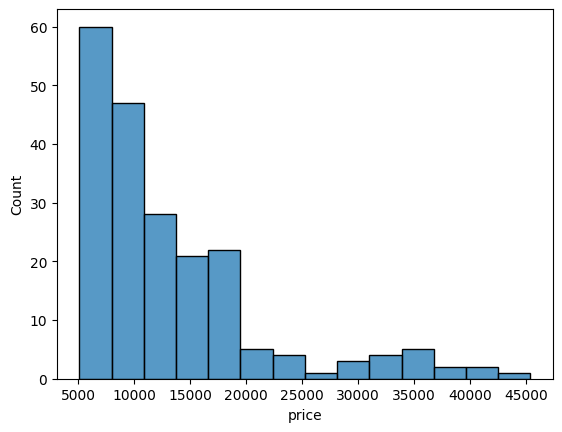

In [ ]:
# Check the distribution of the target variable
sns.histplot(car_df['price'])
plt.show()

<ipython-input-14-6d46f2319152>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = car_df.corr()


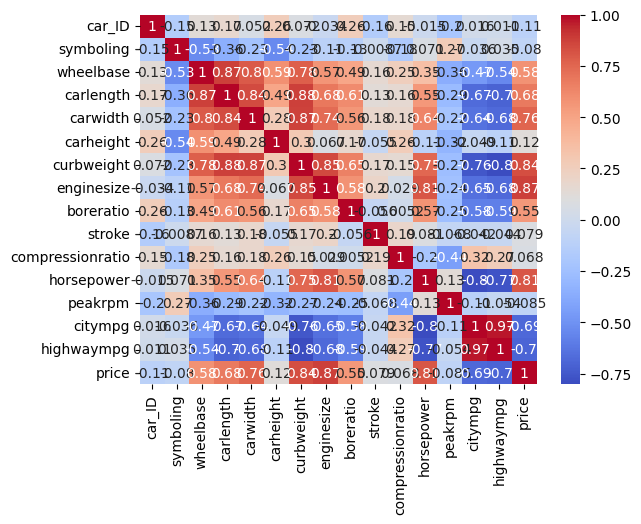

In [ ]:
# Check the correlation between the numerical features and the target variable
corr = car_df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

In [ ]:
# Droping unnecessary columns
car_df.drop(['CarName'], axis=1, inplace=True)

In [ ]:
car_df.head(5)

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
car_df.shape

(205, 25)

In [ ]:
# Convert categorical variables to numerical variables using one-hot encoding
car_df = pd.get_dummies(car_df, columns=['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'], drop_first=True)

In [ ]:
# Split the dataset into features and target variable
X = car_df.drop(['price'], axis=1)
y = car_df['price']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
print('Linear regression')
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

Linear regression
Mean squared error: 7852574.20
Coefficient of determination: 0.90


In [ ]:
# Train and evaluate a Lasso model with hyperparameter tuning
from sklearn.model_selection import train_test_split, GridSearchCV
param_grid = {'alpha': [0.1, 1, 10, 100]}
model = GridSearchCV(Lasso(), param_grid, cv=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Lasso regression')
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))
print('Best hyperparameters:', model.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.259e+07, tolerance: 8.320e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.566e+08, tolerance: 8.247e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.448e+08, tolerance: 8.329e

Lasso regression
Mean squared error: 8809634.17
Coefficient of determination: 0.89
Best hyperparameters: {'alpha': 10}


In [ ]:
from sklearn.tree import DecisionTreeRegressor
param_grid = {'max_depth': [2, 4, 6, 8, 10]}
model = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Decision tree regression')
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))
print('Best hyperparameters:', model.best_params_)

Decision tree regression
Mean squared error: 8422973.46
Coefficient of determination: 0.89
Best hyperparameters: {'max_depth': 6}


In [ ]:
param_grid = {'n_estimators': [50, 100, 200, 300], 'max_depth': [2, 4, 6, 8, 10]}
model = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Random forest regression')
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))
print('Best hyperparameters:', model.best_params_)

Random forest regression
Mean squared error: 3468194.27
Coefficient of determination: 0.96
Best hyperparameters: {'max_depth': 8, 'n_estimators': 50}


In [ ]:
# Train multiple random forest regressor models with different hyperparameters
n_estimators = [100, 500, 1000]
max_depth = [10, 30, 50]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
best_r2_score = 0

for n in n_estimators:
    for d in max_depth:
        for s in min_samples_split:
            for l in min_samples_leaf:
                rf_reg = RandomForestRegressor(n_estimators=n, max_depth=d, min_samples_split=s, min_samples_leaf=l, random_state=42)
                rf_reg.fit(X_train, y_train)
                y_pred = rf_reg.predict(X_test)
                r2 = r2_score(y_test, y_pred)
                if r2 > best_r2_score:
                    best_r2_score = r2
                    best_model = rf_reg
                    best_hyperparameters = {'n_estimators': n, 'max_depth': d, 'min_samples_split': s, 'min_samples_leaf': l}

# Evaluate the performance of the best model on the testing set
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)
print("R2 Score:", best_r2_score)
print("Best Hyperparameters:", best_hyperparameters)


Root Mean Squared Error: 1807.1878563670334
R2 Score: 0.9586298251367377
Best Hyperparameters: {'n_estimators': 1000, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1}
